In [1]:
import nltk

In [2]:
text = """Assim como em outras atividades, a pandemia levou a uma paralisia, parcial do setor automotivo. Em um primeiro momento, férias foram␣
,→antecipadas e diversas fábricas ficaram inoperantes como medida de segurança. Depois, atividades foram retomadas de forma reduzida e as empresas adotaram␣
,→medidas trabalhistas como corte de salário para diminuir custos em um momento de baixa demanda. A produção caiu drasticamente. Em abril, primeiro␣
,→mês totalmente contemplado pela pandemia, as fábricas ficaram virtualmente paradas, e o país produziu apenas 1.847 veículos. Na série histórica da␣
,→Anfavea,iniciada em janeiro de 1957, não há nenhum mês em que a produção foi tão baixa."""

### Tokenize

In [3]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [4]:
sents = sent_tokenize(text)

In [5]:
words = word_tokenize(text)

### Stopwords

In [6]:
from nltk.corpus import stopwords
from string import punctuation

In [7]:
import re
from unicodedata import normalize

In [8]:
stop_words = stopwords.words('portuguese')

In [9]:
stop_words = list(punctuation) + stop_words + ['', "''"]

In [10]:
def normalize_string(string):
    string = string.lower()
    string = re.sub(r'\W', '', normalize("NFKD", string))
    return string

In [11]:
words = list(map(lambda s: normalize_string(s), words))

In [12]:
words = [word for word in words if word not in stop_words]

### Freq Dist

In [13]:
from nltk.probability import FreqDist
# from collections import Counter 

In [14]:
most_common = FreqDist(words).most_common()

In [15]:
from nltk.corpus import machado

In [16]:
raw_text = machado.raw('romance/marm05.txt')

In [17]:
machado_words = word_tokenize(raw_text)

In [18]:
machado_words = list(map(lambda s: normalize_string(s), machado_words))

In [19]:
machado_words = [word for word in machado_words if word not in stop_words]

In [20]:
machado_words_most_common = FreqDist(machado_words).most_common()

### Stemming / Lemmatization

In [21]:
from nltk.stem import RSLPStemmer

In [22]:
stemmer = RSLPStemmer()

In [23]:
words = list(map(lambda word: stemmer.stem(word), words))

In [24]:
stemmed_words = words.copy()

### Levenshtein/Edit Distance 

In [25]:
from nltk import edit_distance

In [26]:
s1 = 'carro'
s2 = 'caro'

edit_distance(s1, s2)

1

### Wordcloud

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
def show_wordcloud(data, title=None):

    wordcloud = WordCloud(
        background_color='white',
        max_words=500,
        max_font_size=40,
        scale=3,
        random_state=1  # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    if title:
        fig.suptitle(title, fontsize=20)

    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()


In [29]:
machado_words = list(map(lambda w: w.replace("'", ""), machado_words))

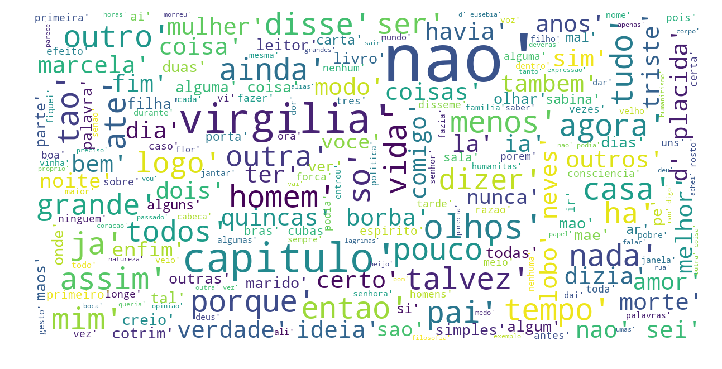

In [30]:
show_wordcloud(machado_words)